Analysis borrowed from Jason Brownlee https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ 

In [1]:
import pandas as pd
import numpy as np
import pylab
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
register_matplotlib_converters()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Freq: MS, Name: Sales, dtype: float64


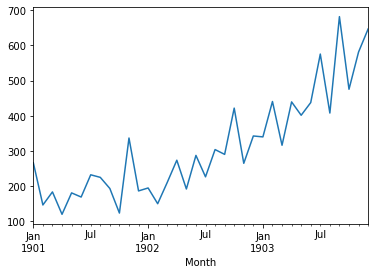

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
print(series.head())
series.plot()
pylab.show()

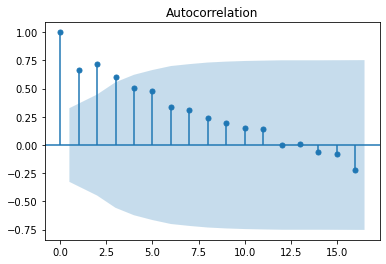

In [3]:
acf_plot = plot_acf(series)

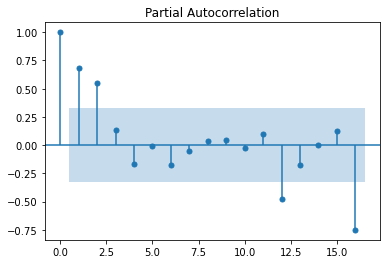

In [4]:
pacf_plot = plot_pacf(series)

<AxesSubplot:xlabel='Month'>

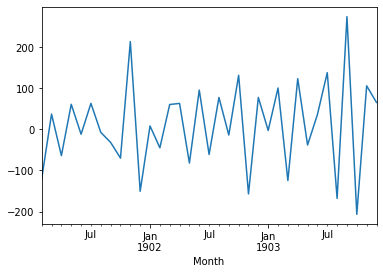

In [5]:
diffs = series.diff().dropna()
diffs.plot()

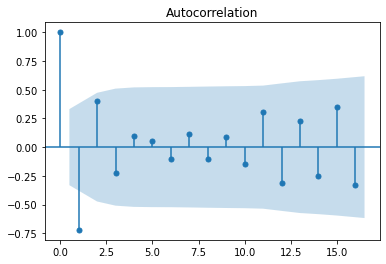

In [6]:
acf_plot = plot_acf(diffs)

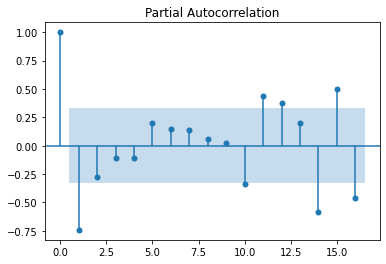

In [9]:
pacf_plot = plot_pacf(diffs)

In [16]:
#create the model
model = SARIMAX(series, order=(1, 1, 1))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -200.391
Date:                Mon, 22 Feb 2021   AIC                            406.782
Time:                        19:12:20   BIC                            411.448
Sample:                    01-01-1901   HQIC                           408.393
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.0

In [13]:
#create the model
model = ARIMA(series, order=(1,1,1))

In [14]:
#fit the model
model_fit = model.fit()

In [15]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Mon, 22 Feb 2021   AIC                            406.782
Time:                        19:12:10   BIC                            411.448
Sample:                    01-01-1901   HQIC                           408.393
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.0

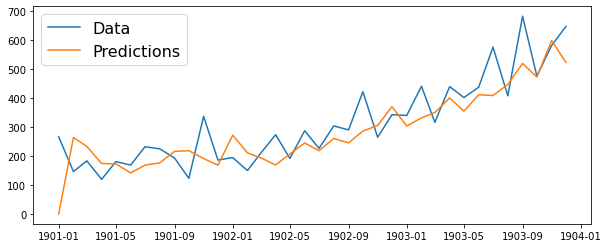

In [17]:
pylab.figure(figsize=(10,4))

pylab.plot(series)
pylab.plot(model_fit.predict(start=series.index[0], end=series.index[-1]))

pylab.legend(('Data', 'Predictions'), fontsize=16)

In [686]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [709]:
date_index = pd.date_range(start='9/1/2019', end='9/1/2020')
differences = 0.6 + arma_generate_sample([1, -0.75, 0.25], [1, 0.3, 0.7], len(date_index) - 1)

In [710]:
v0 = 10
values = [v0] + list(v0 + pylab.cumsum(differences))

In [711]:
series = pd.Series(values, index=date_index)

<AxesSubplot:>

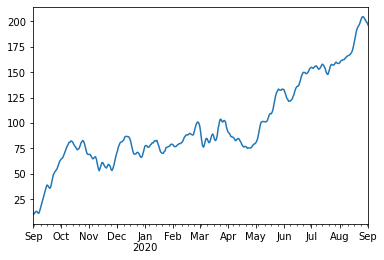

In [712]:
series.plot()

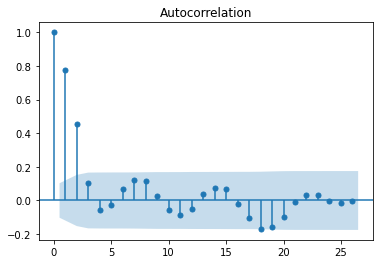

In [713]:
acf_plot = plot_acf(series.diff().dropna())

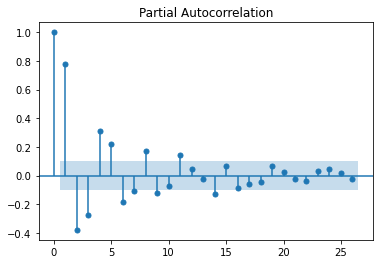

In [714]:
pacf_plot = plot_pacf(series.diff().dropna())

In [715]:
train_end = datetime(2020,8,1)
test_end = datetime(2020,9,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [716]:
#create the model
model = ARIMA(train_data, order=(2,1,2))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -492.302
Date:                Wed, 13 Jan 2021   AIC                            994.604
Time:                        17:19:04   BIC                           1013.675
Sample:                    09-01-2019   HQIC                          1002.207
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7616      0.073     10.424      0.000       0.618       0.905
ar.L2         -0.3307      0.066     -5.018      0.000      -0.460      -0.202
ma.L1          0.2758      0.049      5.671      0.0

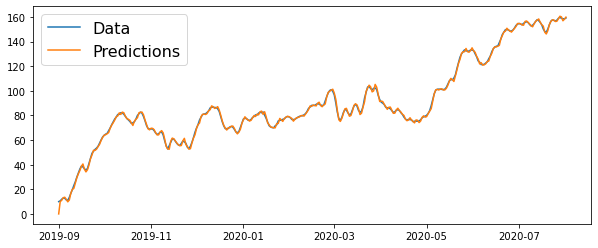

In [717]:
pylab.figure(figsize=(10,4))

pylab.plot(train_data)
pylab.plot(model_fit.predict(start=train_data.index[0], end=train_data.index[-1]))

pylab.legend(('Data', 'Predictions'), fontsize=16)

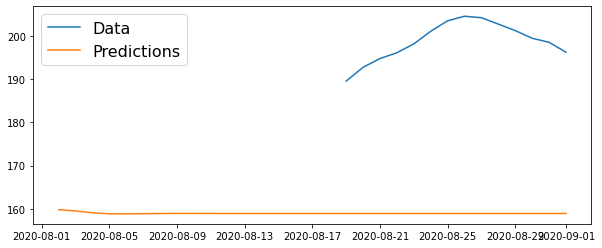

In [721]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
pylab.figure(figsize=(10,4))

pylab.plot(series[-14:])
pylab.plot(predictions)

pylab.legend(('Data', 'Predictions'), fontsize=16)

In [723]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = series[:train_end-timedelta(days=1)]
    model = ARIMA(train_data, order=(2,1,2))
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

Text(0, 0.5, 'Error')

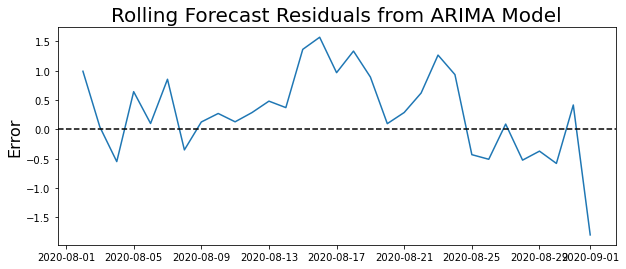

In [725]:
rolling_residuals = test_data - rolling_predictions
pylab.figure(figsize=(10,4))
pylab.plot(rolling_residuals)
pylab.axhline(0, linestyle='--', color='k')
pylab.title('Rolling Forecast Residuals from ARIMA Model', fontsize=20)
pylab.ylabel('Error', fontsize=16)